# 使用自動微分估算簡單線性迴歸的參數(w、b)
## $ y = wx + b$

In [23]:
# 載入套件
import numpy as np 
import torch

## 定義訓練函數

In [24]:
def train(X, y, epochs=100, lr=0.0001):
    loss_list, w_list, b_list=[], [], []
    
    # w、b 初始值均設為常態分配之隨機亂數 
    w = torch.randn(1, requires_grad=True, dtype=torch.float)
    b = torch.randn(1, requires_grad=True, dtype=torch.float)    
    for epoch in range(epochs):   # 執行訓練週期       
        y_pred = w * X + b        # 預測值
        
        # 計算損失函數值
        MSE = torch.square(y - y_pred).mean()        
        MSE.backward()      
        
        # 設定不參與梯度下降，w、b才能運算
        with torch.no_grad():
            # 新權重 = 原權重 — 學習率(learning_rate) * 梯度(gradient)
            w -= lr * w.grad
            b -= lr * b.grad 
        
        # 記錄訓練結果
        if (epoch+1) % 1000 == 0 or epochs < 1000:
            # detach：與運算圖分離，numpy()：轉成陣列
            # w.detach().numpy()
            w_list.append(w.item())  # w.item()：轉成常數
            b_list.append(b.item())
            loss_list.append(MSE.item())
        
        # 梯度重置
        w.grad.zero_()
        b.grad.zero_()
        
    return w_list, b_list, loss_list

## 產生隨機資料

In [25]:
# 產生線性隨機資料100筆，介於 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# 資料加一點雜訊(noise)
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

## 執行訓練

In [26]:
# 執行訓練
w_list, b_list, loss_list = train(torch.tensor(X), torch.tensor(y), epochs=100000)

# 取得 w、b 的最佳解
print(f'w={w_list[-1]}, b={b_list[-1]}')

w=0.9009436964988708, b=1.4582338333129883


In [27]:
# 執行訓練
w_list, b_list, loss_list = train(torch.tensor(X), torch.tensor(y))

# 取得 w、b 的最佳解
print(f'w={w_list[-1]}, b={b_list[-1]}')

w=0.9451056122779846, b=-0.10369889438152313


## 以NumPy驗證

In [28]:
# 執行訓練
coef = np.polyfit(X, y, deg=1)

# 取得 w、b 的最佳解
print(f'w={coef[0]}, b={coef[1]}')

w=0.9009122374306598, b=1.4593412378575308


In [29]:
from sklearn.linear_model import LinearRegression

X2 = X.reshape(X.shape[0], 1)

lr = LinearRegression()
lr.fit(X2, y)

lr.coef_[0], lr.intercept_

(0.9009122374306611, 1.4593412378575188)

## 顯示迴歸線

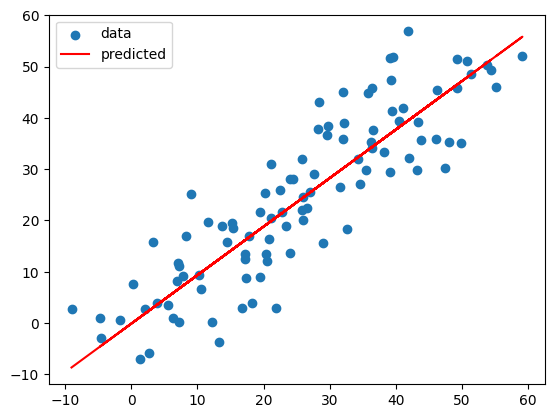

In [36]:
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, w_list[-1] * X + b_list[-1], 'r-', label='predicted')
plt.legend()

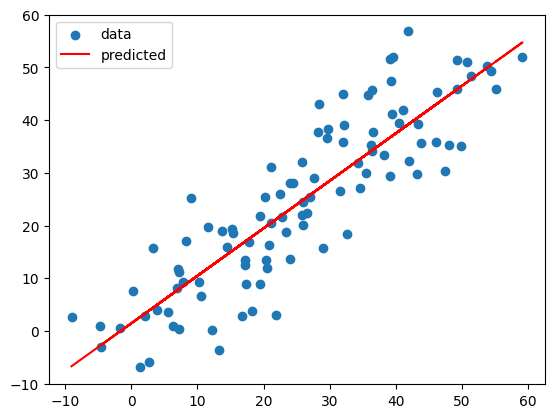

In [31]:
# NumPy 求得的迴歸線
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, coef[0] * X + coef[1], 'r-', label='predicted')
plt.legend()

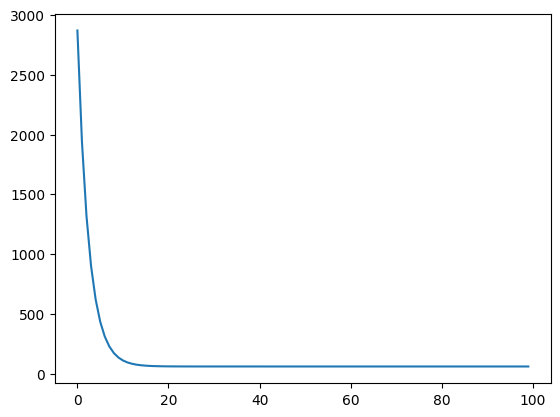

In [37]:
# 損失函數繪圖
plt.plot(loss_list)

In [33]:
loss_list

[2869.7960444543114,
 1939.7644762718464,
 1317.7571755079273,
 901.7571389270763,
 623.5353172352027,
 437.459884624291,
 313.01215419970237,
 229.78116798560356,
 174.11608572831497,
 136.8871236860906,
 111.98826169622676,
 95.33583321691862,
 84.19861662320973,
 76.74998898872892,
 71.76830513091123,
 68.43652779492032,
 66.2081968426047,
 64.71786491642828,
 63.721100673582605,
 63.05443830017286,
 62.608547880758515,
 62.31031203586297,
 62.11082529827621,
 61.977383589040926,
 61.88811397632655,
 61.82838603520925,
 61.78841560753666,
 61.76165925297781,
 61.74374003638225,
 61.73173165444595,
 61.72367597401678,
 61.718264272971176,
 61.71462043795138,
 61.712159173739686,
 61.710489014700535,
 61.70934764160548,
 61.70856014135694,
 61.70800927842896,
 61.70761658967627,
 61.70732974612247,
 61.70711371977457,
 61.70694501771427,
 61.70680796715124,
 61.70669208778226,
 61.70659039284419,
 61.70649817168431,
 61.70641229032793,
 61.70633066412029,
 61.70625188311208,
 61.70617

In [34]:
w_list

[-0.48989832401275635,
 -0.22840434312820435,
 -0.01455409824848175,
 0.16033290326595306,
 0.3033556342124939,
 0.42031967639923096,
 0.5159728527069092,
 0.5941978693008423,
 0.6581701040267944,
 0.7104864120483398,
 0.7532703876495361,
 0.7882588505744934,
 0.8168721199035645,
 0.8402717113494873,
 0.8594074845314026,
 0.8750563859939575,
 0.8878536224365234,
 0.8983188271522522,
 0.9068768620491028,
 0.9138752222061157,
 0.9195980429649353,
 0.9242777824401855,
 0.9281044602394104,
 0.9312334656715393,
 0.9337919354438782,
 0.9358838200569153,
 0.9375941157341003,
 0.9389923810958862,
 0.9401354193687439,
 0.9410697817802429,
 0.9418334364891052,
 0.9424575567245483,
 0.9429675340652466,
 0.9433841109275818,
 0.9437243938446045,
 0.9440022110939026,
 0.9442289471626282,
 0.944413959980011,
 0.9445648193359375,
 0.9446877241134644,
 0.9447878003120422,
 0.9448692202568054,
 0.9449353814125061,
 0.944989025592804,
 0.9450324773788452,
 0.9450675845146179,
 0.9450958371162415,
 0.9451